# Analyze which type has more na

This analysis help us to determine which type of results should we keep. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
na_analysis = pd.read_csv("/net/lazer/lab-lazer/shared_projects/google_audit_reproduce/intermedidate_files/merged_summary/na_summary.csv")

In [5]:
na_analysis

,crawl_id,is_na_url,type,serp_rank,counts
0,20200901,False,ad,0.0,10014
1,20200901,False,ad,1.0,351
2,20200901,False,ad,2.0,2
3,20200901,False,ad,6.0,40
4,20200901,False,ad,7.0,12
...,...,...,...,...,...
56742,20201231,True,searches_related,32.0,560
56743,20201231,True,searches_related,33.0,464
56744,20201231,True,searches_related,34.0,321
56745,20201231,True,searches_related,35.0,386


In [6]:
sum_nan = na_analysis["counts"].sum()

In [7]:
sum_nan

802854976

In [8]:
all_nan = na_analysis.groupby(['type', 'is_na_url'], as_index=False)['counts'].sum()

In [10]:
df = all_nan.pivot(index='type', columns='is_na_url', values='counts')

In [11]:
df = df.fillna(0)

In [12]:
df['sum'] = df.sum(axis=1)

In [13]:
df.columns

Index([False, True, 'sum'], dtype='object', name='is_na_url')

In [16]:
df['nan_prop_within_type'] = df[True]/df['sum']

In [17]:
df

is_na_url,False,True,sum,nan_prop_within_type
type,,,,
ad,205773.0,1345030.0,1550803.0,0.867312
available_on,0.0,850.0,850.0,1.000000
discover_more,0.0,16191.0,16191.0,1.000000
general,242469287.0,0.0,242469287.0,0.000000
images,186216369.0,262076.0,186478445.0,0.001405
img_cards,0.0,382778.0,382778.0,1.000000
knowledge,29524488.0,64227141.0,93751629.0,0.685078
local_results,4812766.0,1052627.0,5865393.0,0.179464
map_results,0.0,418.0,418.0,1.000000


We are keeping 'general', 'news_quotes', 'top_stories', 'twitter_cards', 'twitter_result', 'videos', since they have good non-na rate and are relavant to our research questions. 

In [18]:
type_rank = na_analysis.groupby(['type', 'serp_rank'], as_index=False)['counts'].sum()

In [19]:
type_rank

,type,serp_rank,counts
0,ad,0.0,643891
1,ad,1.0,34273
2,ad,2.0,7358
3,ad,3.0,2725
4,ad,4.0,20
...,...,...,...
602,videos,35.0,2395
603,videos,36.0,433
604,videos,37.0,113
605,videos,38.0,64


In [20]:
type_rank['rank'] = type_rank['serp_rank']+1

In [34]:
label_grouped_matrix = type_rank.pivot_table(index='type', columns='rank', values='counts')

In [37]:
label_grouped_matrix_sorted_norm = label_grouped_matrix.div(label_grouped_matrix.sum(axis=1), axis=0)

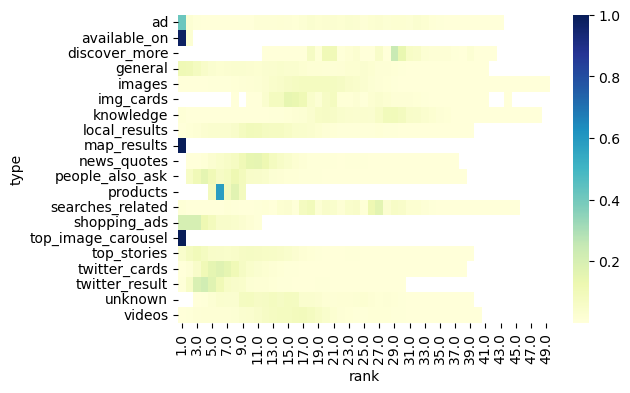

In [38]:
fig, ax = plt.subplots(figsize=(6,4)); 
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
sns.heatmap(label_grouped_matrix_sorted_norm , cmap='YlGnBu', annot=False, fmt='0.0f')
plt.savefig("../data/plots/raw_urltype_rank_norm.png", bbox_inches='tight', dpi=200) 
plt.show()

In [28]:
categories = type_rank['type'].unique()
type_avg_rank = {}
for cat in categories:
    sub_df = type_rank[type_rank['type']==cat]
    weighted_avg = np.average(sub_df['rank'], weights=sub_df['counts'])
    type_avg_rank[cat] = weighted_avg

ad : 13.434627738017014
available_on : 1.0223529411764707
discover_more : 26.80032116607992
general : 11.104010616404377
images : 18.287903918332223
img_cards : 18.430168400482785
knowledge : 25.502514446975635
local_results : 12.390422091068748
map_results : 1.0
news_quotes : 11.12224436964649
people_also_ask : 7.240480261997383
products : 6.583333333333333
searches_related : 23.19298361987413
shopping_ads : 3.5798816568047336
top_image_carousel : 1.0
top_stories : 8.830300180304835
twitter_cards : 7.132569613001682
twitter_result : 5.603418101060745
unknown : 14.357677972341843
videos : 14.980761199179241


In [29]:
type_avg_rank

{'ad': 13.434627738017014,
 'available_on': 1.0223529411764707,
 'discover_more': 26.80032116607992,
 'general': 11.104010616404377,
 'images': 18.287903918332223,
 'img_cards': 18.430168400482785,
 'knowledge': 25.502514446975635,
 'local_results': 12.390422091068748,
 'map_results': 1.0,
 'news_quotes': 11.12224436964649,
 'people_also_ask': 7.240480261997383,
 'products': 6.583333333333333,
 'searches_related': 23.19298361987413,
 'shopping_ads': 3.5798816568047336,
 'top_image_carousel': 1.0,
 'top_stories': 8.830300180304835,
 'twitter_cards': 7.132569613001682,
 'twitter_result': 5.603418101060745,
 'unknown': 14.357677972341843,
 'videos': 14.980761199179241}

In [39]:
df['avg_rank'] = type_avg_rank.values()

In [43]:
df

is_na_url,False,True,sum,nan_prop_within_type,avg_rank
type,,,,,
ad,205773.0,1345030.0,1550803.0,0.867312,13.434628
available_on,0.0,850.0,850.0,1.000000,1.022353
discover_more,0.0,16191.0,16191.0,1.000000,26.800321
general,242469287.0,0.0,242469287.0,0.000000,11.104011
images,186216369.0,262076.0,186478445.0,0.001405,18.287904
img_cards,0.0,382778.0,382778.0,1.000000,18.430168
knowledge,29524488.0,64227141.0,93751629.0,0.685078,25.502514
local_results,4812766.0,1052627.0,5865393.0,0.179464,12.390422
map_results,0.0,418.0,418.0,1.000000,1.000000


## Format the table to look better

In [44]:
df[[False,True,"sum"]] = df[[False,True,"sum"]].astype(int)


In [46]:
df[["nan_prop_within_type","avg_rank"]] = df[["nan_prop_within_type","avg_rank"]].round(1)

In [48]:
df.columns = ['Num Parsed Urls', 'Num Errors', 'Total Num', "Error Rate of Type", "Average Rank"]

In [49]:
df

,Num Parsed Urls,Num Errors,Total Num,Error Rate of Type,Average Rank
type,,,,,
ad,205773,1345030,1550803,0.9,13.4
available_on,0,850,850,1.0,1.0
discover_more,0,16191,16191,1.0,26.8
general,242469287,0,242469287,0.0,11.1
images,186216369,262076,186478445,0.0,18.3
img_cards,0,382778,382778,1.0,18.4
knowledge,29524488,64227141,93751629,0.7,25.5
local_results,4812766,1052627,5865393,0.2,12.4
map_results,0,418,418,1.0,1.0


In [51]:
df.to_csv("../data/house_analysis/type_na_summary.csv")

In [54]:
print(df.to_latex(float_format="{:.1f}".format))

\begin{tabular}{lrrrrr}
\toprule
 & Num Parsed Urls & Num Errors & Total Num & Error Rate of Type & Average Rank \\
type &  &  &  &  &  \\
\midrule
ad & 205773 & 1345030 & 1550803 & 0.9 & 13.4 \\
available_on & 0 & 850 & 850 & 1.0 & 1.0 \\
discover_more & 0 & 16191 & 16191 & 1.0 & 26.8 \\
general & 242469287 & 0 & 242469287 & 0.0 & 11.1 \\
images & 186216369 & 262076 & 186478445 & 0.0 & 18.3 \\
img_cards & 0 & 382778 & 382778 & 1.0 & 18.4 \\
knowledge & 29524488 & 64227141 & 93751629 & 0.7 & 25.5 \\
local_results & 4812766 & 1052627 & 5865393 & 0.2 & 12.4 \\
map_results & 0 & 418 & 418 & 1.0 & 1.0 \\
news_quotes & 78762106 & 0 & 78762106 & 0.0 & 11.1 \\
people_also_ask & 0 & 17834682 & 17834682 & 1.0 & 7.2 \\
products & 0 & 12 & 12 & 1.0 & 6.6 \\
searches_related & 0 & 30377117 & 30377117 & 1.0 & 23.2 \\
shopping_ads & 169 & 0 & 169 & 0.0 & 3.6 \\
top_image_carousel & 0 & 9 & 9 & 1.0 & 1.0 \\
top_stories & 29839466 & 0 & 29839466 & 0.0 & 8.8 \\
twitter_cards & 96231736 & 0 & 96231736 &